In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ratings.csv')

df.head()

,userId,movieId,rating,timestamp
0,1,296,5.0,1.147880e+09
1,1,306,3.5,1.147869e+09
2,1,307,5.0,1.147869e+09
3,1,665,5.0,1.147879e+09
4,1,899,3.5,1.147869e+09


In [ ]:
df = pd.read_csv('/content/movies.csv')

df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
import pandas as pd

# Read both files
df_movies = pd.read_csv('/content/movies.csv')
df_ratings = pd.read_csv('/content/ratings.csv')

# Merge them on 'movieId'
df = pd.merge(df_ratings, df_movies, on='movieId', how='left')

# Show the first 5 rows
print(df.head())


   userId  movieId  rating     timestamp  \
0       1      296     5.0  1.147880e+09   
1       1      306     3.5  1.147869e+09   
2       1      307     5.0  1.147869e+09   
3       1      665     5.0  1.147879e+09   
4       1      899     3.5  1.147869e+09   

                                              title  \
0                               Pulp Fiction (1994)   
1  Three Colors: Red (Trois couleurs: Rouge) (1994)   
2  Three Colors: Blue (Trois couleurs: Bleu) (1993)   
3                                Underground (1995)   
4                        Singin' in the Rain (1952)   

                        genres  
0  Comedy|Crime|Drama|Thriller  
1                        Drama  
2                        Drama  
3             Comedy|Drama|War  
4       Comedy|Musical|Romance  


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18293872 entries, 0 to 18293871
Data columns (total 6 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  float64
 4   title      object 
 5   genres     object 
dtypes: float64(2), int64(2), object(2)
memory usage: 837.4+ MB


In [ ]:
df.shape


(13573988, 6)

In [ ]:
df.describe()


,movieId,userId,rating,timestamp
count,1.357399e+07,1.351156e+07,1.351156e+07,1.351156e+07
mean,2.206912e+04,4.394779e+04,3.531789e+00,1.216022e+09
std,4.024734e+04,2.516854e+04,1.061315e+00,2.270057e+08
min,1.000000e+00,1.000000e+00,5.000000e-01,7.896520e+08
25%,1.198000e+03,2.230800e+04,3.000000e+00,1.012879e+09
50%,2.959000e+03,4.374300e+04,3.500000e+00,1.197826e+09
75%,8.783000e+03,6.575000e+04,4.000000e+00,1.447611e+09
max,2.091710e+05,8.741900e+04,5.000000e+00,1.574328e+09


In [ ]:
df.isnull().sum()


,0
userId,0
movieId,0
rating,0
timestamp,1
title,0
genres,0


In [ ]:
df.duplicated().sum()


np.int64(0)

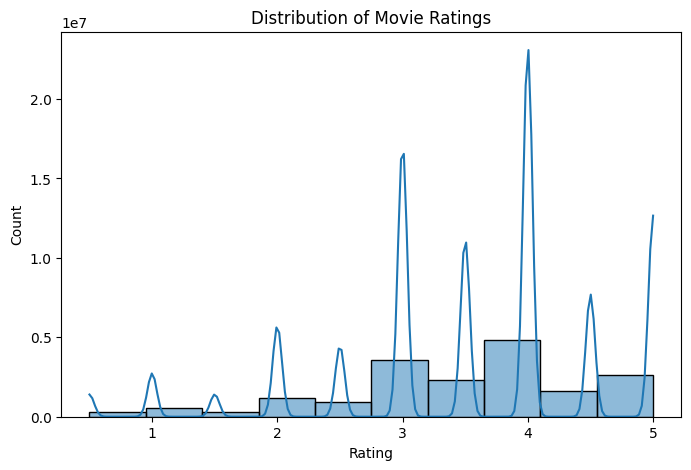

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.histplot(df['rating'], bins=10, kde=True)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


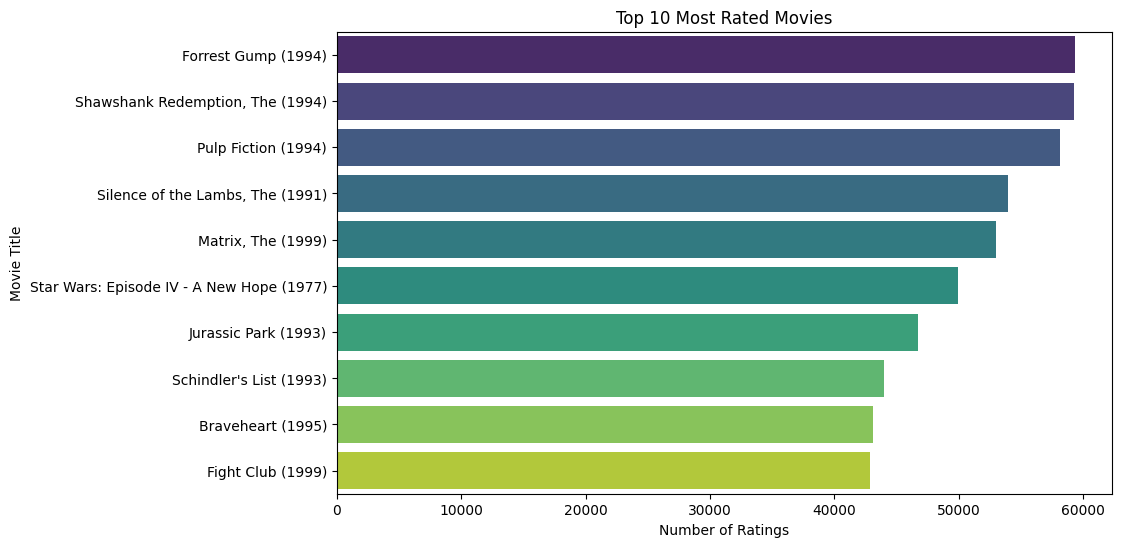

In [ ]:
top_movies = df['title'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_movies.values, y=top_movies.index, palette='viridis')
plt.title('Top 10 Most Rated Movies')
plt.xlabel('Number of Ratings')
plt.ylabel('Movie Title')
plt.show()


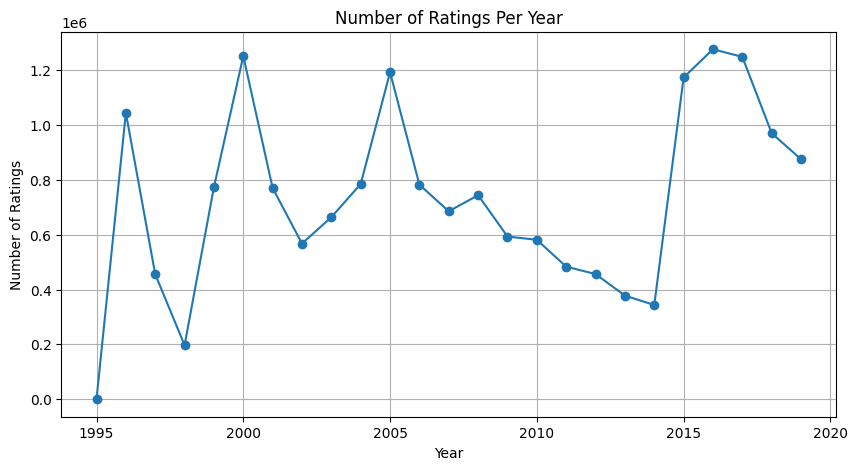

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df['year'] = df['timestamp'].dt.year

ratings_by_year = df.groupby('year').size()

plt.figure(figsize=(10, 5))
ratings_by_year.plot(kind='line', marker='o')
plt.title('Number of Ratings Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Ratings')
plt.grid(True)
plt.show()
